In [57]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, mean_squared_error



In [58]:
data = pd.read_csv('bank-data.csv')
data.head()

,CERT,CHCLASS1,CITYST,COST,FAILDATE,FIN,ID,NAME,QBFASSET,QBFDEP,RESTYPE,RESTYPE1,SAVR
0,NaN,NM,"EAST PEORIA, IL",NaN,5/28/1934,0,1,FON DU LAC STATE BANK,374.0,238.0,FAILURE,PO,FDIC
1,NaN,NM,"GRANTWOOD, NJ",NaN,1/3/1935,0,10,CLIFFSIDE PARK TITLE GUARANTEE & TRUST CO.,2305.0,590.0,FAILURE,PO,FDIC
2,NaN,NM,"CUMMINGS, ND",NaN,12/21/1936,0,100,THE CUMMINGS STATE BANK,NaN,30.0,FAILURE,P&A,FDIC
3,13797.0,NM,"TAYLOR, NE",1653.0,5/31/1985,2466,1000,BANK OF TAYLOR,14542.0,13360.0,FAILURE,PA,FDIC
4,18388.0,NM,"FAIRFIELD, NE",1656.0,5/31/1985,6571,1001,FAIRFIELD STATE BANK,6795.0,6034.0,FAILURE,PO,FDIC


In [59]:
data.columns

Index(['CERT', 'CHCLASS1', 'CITYST', 'COST', 'FAILDATE', 'FIN', 'ID', 'NAME',
       'QBFASSET', 'QBFDEP', 'RESTYPE', 'RESTYPE1', 'SAVR'],
      dtype='object')

In [60]:
data.info

<bound method DataFrame.info of          CERT CHCLASS1           CITYST     COST    FAILDATE   FIN    ID  \
0         NaN       NM  EAST PEORIA, IL      NaN   5/28/1934     0     1   
1         NaN       NM    GRANTWOOD, NJ      NaN    1/3/1935     0    10   
2         NaN       NM     CUMMINGS, ND      NaN  12/21/1936     0   100   
3     13797.0       NM       TAYLOR, NE   1653.0   5/31/1985  2466  1000   
4     18388.0       NM    FAIRFIELD, NE   1656.0   5/31/1985  6571  1001   
...       ...      ...              ...      ...         ...   ...   ...   
4104  30934.0       SL   TITUSVILLE, FL   7096.0    5/2/1985  1666   987   
4105  28448.0       SB  NEW ORLEANS, LA  51544.0   5/10/1985  1718   991   
4106  30054.0       SL       MARION, OH      0.0   5/22/1985  1667   994   
4107  29052.0       SL     FREEPORT, IL  13607.0   5/28/1985  1721   996   
4108   9477.0       NM     WOODBURN, OR  18791.0   5/31/1985  1923   998   

                                            NAME  QBFAS

In [61]:
what_are_restypes = data['RESTYPE'].value_counts()
what_are_restypes

RESTYPE
FAILURE       3516
ASSISTANCE     593
Name: count, dtype: int64

# Data Cleaning

In [62]:
test = data.isna().sum()
test

CERT        488
CHCLASS1      0
CITYST        0
COST        637
FAILDATE      0
FIN           0
ID            0
NAME          0
QBFASSET    154
QBFDEP        2
RESTYPE       0
RESTYPE1      0
SAVR          0
dtype: int64

## To Do:
- Figure out how to deal with the missing values

In [63]:
X = pd.DataFrame(data[['COST', 'QBFASSET', 'QBFDEP']].values)

y = data['RESTYPE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [64]:
X_train.corr()

,0,1,2
0,1.000000,0.609933,0.679724
1,0.609933,1.000000,0.813760
2,0.679724,0.813760,1.000000


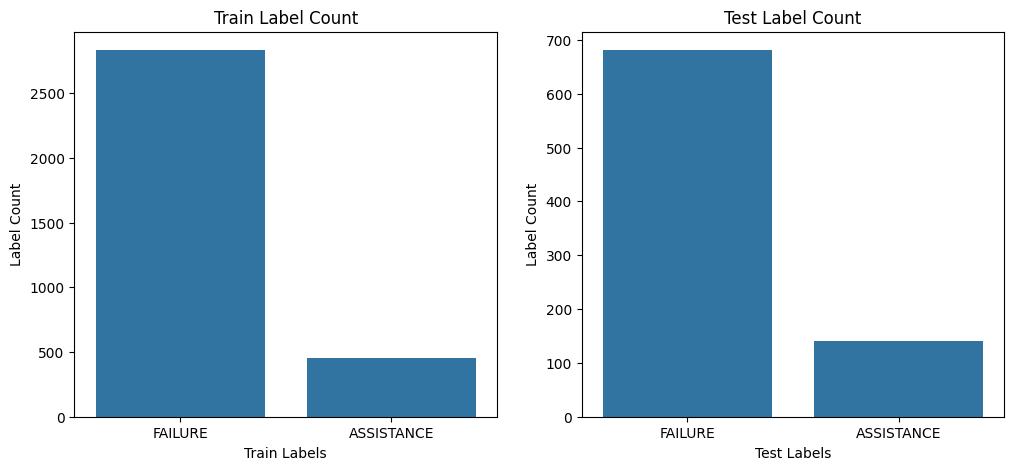

In [65]:
# Courtesy of Stackoverflow: https://stackoverflow.com/questions/70379709/visualization-data-train-and-data-test-from-train-test-split-with-seaborn

fig, ax = plt.subplots(1,2, figsize=(12,5))
for idx, group in enumerate([('Train', y_train), ('Test', y_test)]):
    datum = group[1].value_counts()
    sns.barplot(ax=ax[idx], x=datum.index, y=datum.values)
    ax[idx].set_title(f'{group[0]} Label Count')
    ax[idx].set_xlabel(f'{group[0]} Labels')
    ax[idx].set_ylabel('Label Count')

plt.show()

What is assistance? Well, it's when the FDIC does not establish a receivership but provides financial assistance to an open institution to prevent it from failing

In [66]:
data.info

<bound method DataFrame.info of          CERT CHCLASS1           CITYST     COST    FAILDATE   FIN    ID  \
0         NaN       NM  EAST PEORIA, IL      NaN   5/28/1934     0     1   
1         NaN       NM    GRANTWOOD, NJ      NaN    1/3/1935     0    10   
2         NaN       NM     CUMMINGS, ND      NaN  12/21/1936     0   100   
3     13797.0       NM       TAYLOR, NE   1653.0   5/31/1985  2466  1000   
4     18388.0       NM    FAIRFIELD, NE   1656.0   5/31/1985  6571  1001   
...       ...      ...              ...      ...         ...   ...   ...   
4104  30934.0       SL   TITUSVILLE, FL   7096.0    5/2/1985  1666   987   
4105  28448.0       SB  NEW ORLEANS, LA  51544.0   5/10/1985  1718   991   
4106  30054.0       SL       MARION, OH      0.0   5/22/1985  1667   994   
4107  29052.0       SL     FREEPORT, IL  13607.0   5/28/1985  1721   996   
4108   9477.0       NM     WOODBURN, OR  18791.0   5/31/1985  1923   998   

                                            NAME  QBFAS

In [67]:
data = data.replace([np.inf, -np.inf], np.nan).dropna()

for c in data.columns:
    data[c]=data[c].apply(str)
    le=preprocessing.LabelEncoder().fit(data[c])
    data[c] =le.transform(data[c])
    pd.to_numeric(data[c]).astype(float)

X = pd.DataFrame(data[['COST', 'QBFASSET', 'QBFDEP']].values)
y = data['RESTYPE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)




In [68]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred, multioutput= 'uniform_average') # Replace with the appropriate error calculation depending on the task
print("Mean Squared Error:", mse)

Accuracy: 0.8474820143884892
Mean Squared Error: 0.15251798561151078
